# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean

# linear fit using statsmodels
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# For task 5.3: to plot histograms
import seaborn as sns

# For task 4.3
import itertools

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

_1. Load the data using pandas. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe._

We start by importing the dataset of Pitchfork Music Reviews and Spotify Musical Features.

In [2]:
PATH = 'data/'
DATA_FILE = 'pitchfork.csv.gz'
df = pd.read_csv(PATH + DATA_FILE, compression = 'gzip')

To ensure reproducibility in our notebook, we set a seed equal to 1.

In [3]:
seed = 1
np.random.seed(seed)

Let's have a first glance at the data and data shape.

In [4]:
print("The data is of shape", df.shape)
df.head().round(decimals = 3)

The data is of shape (16785, 18)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.512,0.500,5.250,-5.627,0.032,0.725,0.024,0.165,0.555,101.395
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.370,0.325,4.471,-19.154,0.149,0.647,0.559,0.528,0.179,107.623
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,0.199,0.553,133.896
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425,0.433,5.700,-12.871,0.028,0.310,0.224,0.125,0.451,104.354
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121


We then remove duplicate reviews.

In [5]:
# Creation of a clean version of the data (without modifying the original one)
cleaned_df = df.copy(deep = True)

# We set artist' and albums' names to lower cases to not miss duplicates
# We could improve it by using the levenstein distance
cleaned_df['artist'] = cleaned_df['artist'].str.lower()
cleaned_df['album'] = cleaned_df['album'].str.lower()

# Drop of duplicates
cleaned_df = cleaned_df.drop_duplicates(subset = ['album', 'artist'], keep = 'first', inplace = False)
print("After duplicates deletion, the data is of shape", cleaned_df.shape)

After duplicates deletion, the data is of shape (16738, 18)


We see that the new number of rows is **16738**. Let's again print the data set.

In [6]:
cleaned_df.head().round(decimals = 3)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,studio 1,studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.512,0.500,5.250,-5.627,0.032,0.725,0.024,0.165,0.555,101.395
1,john fahey,the great santa barbara oil slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.370,0.325,4.471,-19.154,0.149,0.647,0.559,0.528,0.179,107.623
2,reigning sound,too much guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,0.199,0.553,133.896
3,the red thread,after the last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425,0.433,5.700,-12.871,0.028,0.310,0.224,0.125,0.451,104.354
4,mac miller,swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121


We now save a copy of this data frame that we will use for Part 2 (tasks 5 to 8).

In [7]:
cleaned_df_part2 = cleaned_df.copy()

We see in the table above that the `reviewdate` is not in a good datetime format.

In [8]:
cleaned_df["reviewdate"] = pd.to_datetime(cleaned_df["reviewdate"])
cleaned_df.head().round(decimals = 3)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,studio 1,studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.512,0.500,5.250,-5.627,0.032,0.725,0.024,0.165,0.555,101.395
1,john fahey,the great santa barbara oil slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.370,0.325,4.471,-19.154,0.149,0.647,0.559,0.528,0.179,107.623
2,reigning sound,too much guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,0.199,0.553,133.896
3,the red thread,after the last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425,0.433,5.700,-12.871,0.028,0.310,0.224,0.125,0.451,104.354
4,mac miller,swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121


We now generate descriptive statistics of our new data frame.

In [9]:
cleaned_df.describe().round(decimals = 3)

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000,16738.000
mean,7.049,2009.346,0.512,0.601,5.217,-9.283,0.091,0.302,0.275,0.196,0.405,120.326
std,1.247,7.795,0.159,0.203,1.614,4.238,0.090,0.262,0.299,0.105,0.182,15.482
min,0.000,1957.000,-1.000,-1.000,-1.000,-51.729,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
25%,6.500,2005.000,0.409,0.474,4.333,-11.218,0.041,0.091,0.010,0.135,0.274,111.240
50%,7.300,2010.000,0.511,0.625,5.231,-8.444,0.057,0.229,0.149,0.174,0.406,120.397
75%,7.800,2015.000,0.623,0.750,6.100,-6.392,0.100,0.460,0.497,0.228,0.532,129.141
max,10.000,2019.000,0.974,0.999,11.000,4.078,0.958,0.996,0.982,0.978,0.971,215.972


By printing the main propreties of our data frame, we see that the columns `danceability`, `energy`, `key`, `speechiness`, `acousticness`, `instrumentalness`, `liveness` and `valence` show a minimum of -1. However, we know that these features should range from 0.0 to 1.0. Consequently, we will drop the rows with values that do not make any sense, i.e. that are negative.

In [10]:
neg_cols = ["danceability", "energy", "key", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]
cleaned_df = cleaned_df[~((cleaned_df.danceability < 0) | (cleaned_df.energy < 0) | \
                         (cleaned_df.key < 0) | (cleaned_df.speechiness < 0) | \
                         (cleaned_df.acousticness < 0) | (cleaned_df.instrumentalness < 0) | \
                         (cleaned_df.liveness < 0) | (cleaned_df.valence < 0))]
print(cleaned_df.shape)
cleaned_df.describe().round(decimals = 3)

(16730, 18)


,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000,16730.000
mean,7.049,2009.346,0.513,0.602,5.219,-9.287,0.091,0.302,0.275,0.197,0.406,120.377
std,1.247,7.797,0.156,0.201,1.609,4.236,0.087,0.261,0.298,0.102,0.180,15.286
min,0.000,1957.000,0.039,0.000,0.000,-51.729,0.009,0.000,0.000,0.015,0.000,23.983
25%,6.500,2005.000,0.409,0.474,4.333,-11.218,0.041,0.091,0.010,0.135,0.274,111.255
50%,7.300,2010.000,0.511,0.625,5.231,-8.446,0.057,0.229,0.150,0.174,0.406,120.406
75%,7.800,2015.000,0.623,0.750,6.100,-6.397,0.100,0.461,0.498,0.228,0.532,129.146
max,10.000,2019.000,0.974,0.999,11.000,4.078,0.958,0.996,0.982,0.978,0.971,215.972


With the above pre-processing we sucessfully removed all aberrant values that could impact our analysis.

_2. Plot the distribution of album release years and the average score of albums per year._

For homogeneity, let's set the general visual style and colors of our plots.

In [11]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("hls", 8)

We now plot the distribution of album release years.

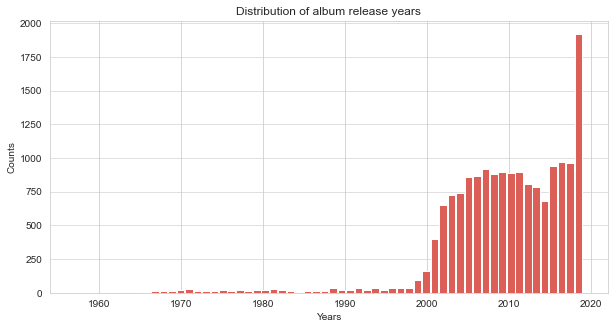

In [12]:
plt.figure(figsize = (10,5))
cleaned_df["releaseyear"].plot(kind = "hist", bins = 60, grid = True, rwidth = 0.9, color = color_palette[0])
plt.title('Distribution of album release years')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.grid(axis = 'y', alpha = 0.75)

We see that most albums in our data set were released after the year 2000, with the most albums (> 1750 albums) released in 2019. We now plot the average score of albums per year.

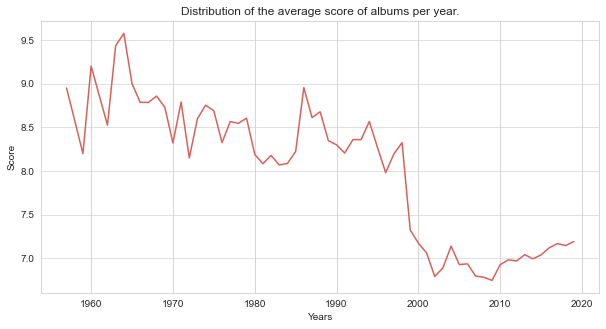

In [13]:
plt.figure(figsize = (10,5))
avg_score_per_year_df = cleaned_df.groupby(['releaseyear'])['score'].agg('mean')
avg_score_per_year_df.plot(kind = 'line', x = 'releaseyear', y = 'score', color = color_palette[0])
plt.title('Distribution of the average score of albums per year.')
plt.xlabel('Years')
plt.ylabel('Score')
plt.grid(axis = 'y', alpha = 0.75)
plt.show()

We remark that the mean scores overally decreased with time (being around 9 in 1957 and around 7.2 in 2019).

_3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long._

Let's compute the different properties of our numercial columns.

In [14]:
cleaned_df.describe(include = np.number).loc[['mean', '50%','min', 'max']].round(decimals = 3)

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mean,7.049,2009.346,0.513,0.602,5.219,-9.287,0.091,0.302,0.275,0.197,0.406,120.377
50%,7.300,2010.000,0.511,0.625,5.231,-8.446,0.057,0.229,0.150,0.174,0.406,120.406
min,0.000,1957.000,0.039,0.000,0.000,-51.729,0.009,0.000,0.000,0.015,0.000,23.983
max,10.000,2019.000,0.974,0.999,11.000,4.078,0.958,0.996,0.982,0.978,0.971,215.972


Now we print out the numerical columns we have.

In [15]:
cleaned_df.describe(include = np.number).columns

Index(['score', 'releaseyear', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

Now, we can plot the distribution of the numerical columns and compare them.

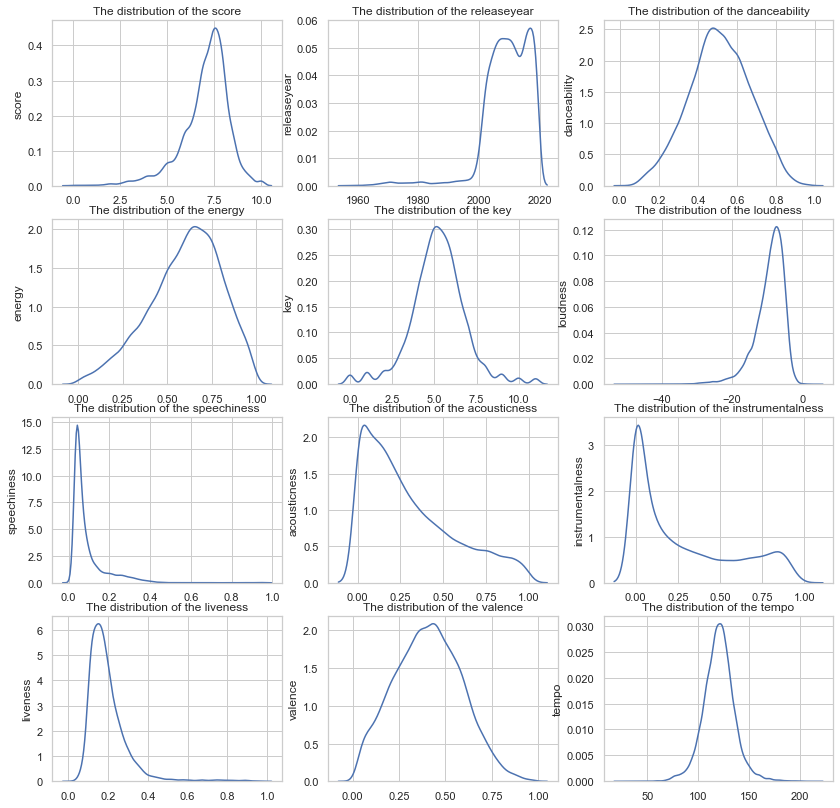

In [16]:
plt.figure(figsize = (14,14))
num_cols = cleaned_df.describe(include = np.number).columns
for idx, num_col in enumerate(num_cols):
    sns.set_theme(style = "whitegrid")
    plt.subplot(4,3,idx + 1)
    sns.kdeplot(data = cleaned_df[num_col], palette = color_palette[2])
    plt.ylabel(num_col)
    plt.xlabel("")
    plt.title("The distribution of the {}".format(num_col))
plt.show()

We see that all features are very differently distributed, with many left- and right-skewed distributions.

_4. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the genre column, assign the value 'Other' for albums where the value is either 'none' or NaN._

Let's list how many different values there are in each column.

In [17]:
# Count of unique entities in each column
cleaned_df.describe(exclude = [np.number], datetime_is_numeric = True).loc[['count', 'unique']]

,artist,album,reviewauthor,reviewdate,recordlabel,genre
count,16730,16730,16730,16730,16730,16730
unique,7888,16165,554,NaN,3030,10


We see that there are more than 10 distinct values for all of the categorical columns apart from the genre. Let's have a closer look at its values.

In [18]:
print('The different genre values are:')
print(*cleaned_df['genre'].unique(), sep = ", ")

The different genre values are:
Electronic, Folk/Country, Rock, Rap, Global, Experimental, Metal, Pop/R&B, Jazz, none


Let's assign the value 'Other' for albums where the value is either 'none' or 'NaN'.

In [19]:
# Creating the condition to remove the 'none' and 'NaN' values
mask = cleaned_df.copy(deep = True)
mask = (cleaned_df['genre'] == 'none').copy() | (cleaned_df['genre'] == np.nan).copy()
cleaned_df.loc[mask,'genre'] = 'Other'

In [20]:
print('The different genre values are:')
print(*cleaned_df['genre'].unique(), sep = ", ")

The different genre values are:
Electronic, Folk/Country, Rock, Rap, Global, Experimental, Metal, Pop/R&B, Jazz, Other


We have correctly replaced 'none' or NaN values by 'Other'.

Finally, we will drop all rows containing 'none' or 'Nan' values in a column.

In [21]:
print(cleaned_df.shape)
cleaned_df.dropna()
cleaned_df.shape

(16730, 18)


(16730, 18)

It seems there are no None or NaN values.

_5. Discuss: This dataset was built with found data—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's Wikipedia page, point three (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected._

This data may not be representative of music albums in general due to the following reasons:

1. Looking at the analysis above, we see a clear correlation between the albums' release years and their scores. Indeed, starting from the 2000s, the number of albums released increased hugely while their scores diminished. It therefore seems that there is a preference of older albums. Additionally, the average score of each year is proportional to the number of albums released that year. It therefore seems that reviews are "harder" with albums the years with many releases. 

2. Then, from Pitchfork's Wikipedia page, we find that this online music publication clearly favorises specific music genres (independent music, lo-fi and obscure indie rock, the latest being extensively covered in the magasine). As a result, there seems to be a great genre preference (bias) in this dataset.

3. Finally, the wikipedia page also criticizes the reviews' content. Indeed, they are published very early, often having provocative content, aiming to attract attention. They also depend hugely on the the review author, making them very biased and sometimes contradictory.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

_1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0._ 

We create a new column called `{genre}_onehot`. The value in the column is 1 if the album is of the given genre and 0 if it is not.

In [22]:
cleaned_df = pd.concat([cleaned_df, pd.get_dummies(cleaned_df['genre']).add_suffix('_onehot')], axis = 1)
cleaned_df.head(5).round(decimals = 3)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
0,studio 1,studio 1,Andy Battaglia,8.5,2009.0,2009-02-18,Studio,Electronic,0.512,0.500,...,1,0,0,0,0,0,0,0,0,0
1,john fahey,the great santa barbara oil slick,Mark Richardson,8.2,2005.0,2005-02-13,Water,Folk/Country,0.370,0.325,...,0,0,1,0,0,0,0,0,0,0
2,reigning sound,too much guitar,Stephen M. Deusner,8.3,2004.0,2004-08-19,In the Red,Electronic,0.254,0.913,...,1,0,0,0,0,0,0,0,0,0
3,the red thread,after the last,Chris Dahlen,7.3,2003.0,2003-07-17,Badman,Rock,0.425,0.433,...,0,0,0,0,0,0,0,0,0,1
4,mac miller,swimming,Evan Rytlewski,7.5,2018.0,2018-08-03,Warner Bros.,Rap,0.625,0.438,...,0,0,0,0,0,0,0,0,1,0


_2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM)._

Below is the creation of the function that returns an array for a certain data frame.

In [23]:
def numpy_helper(df, cols):
    '''
    Function that return an array for a certain data frame.
    Inputs:
        * df : dataframe of interest with N rows
        * cols : list of M columns
    Output:
        * output : numpy array of dimension NxM
    '''
    output = df[cols].to_numpy()
    return output

_3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%._

We create a train and a test data set using only the genre-related one-hot features. The x_train/x_test data sets contain only the features while the y_test/y_train data sets contain the scores.

In [24]:
column_names = []
for genre in cleaned_df['genre'].unique() :
    column_names.append(genre + '_onehot')
x = numpy_helper(cleaned_df, column_names )
y = numpy_helper(cleaned_df, 'score')
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 123)

We check that our x and y have the same number of albums and that the the test and train data sets have the same number of features.

In [25]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(11711, 10) (11711,)
(5019, 10) (5019,)


We are happy to see that our checks are fulfilled.

_4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data)._

We first define our baseline regressor functions for fitting and prediction.

In [26]:
def baseline_regressor_fit(y_train):
    '''
    Function that trains our model by taking the mean of the training set.
    Inputs:
        * y_train : score of training set
    Output:
        * output : average score of training set
    '''
    output = np.mean(y_train)
    return output

def baseline_regressor_predict(x_test, mean_train):
    '''
    Function that predicts scores for a testing set.
    Inputs:
        * x_test : features of the testing set
        * mean_train : average score of the training set
    Output:
        * output : prediction of scores for the testing set (average score of training set)
    '''
    output = np.ones(len(x_test)) * mean_train
    return output

First, we create a train and a test data set using only the categorical features (`feature_cols`) and the `score`. Then we calculate the average score of the training set. Finally, we always predict the mean of the training set for the testing set. 

In [27]:
feature_cols = ['releaseyear', 'key', 'acousticness', 'danceability', 'energy', 'instrumentalness','liveness', \
                'loudness', 'speechiness', 'valence', 'tempo'] + column_names

x = numpy_helper(cleaned_df, feature_cols )
y = numpy_helper(cleaned_df, 'score')
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 123)
mean_train = baseline_regressor_fit(y_train)
y_pred_baseline = baseline_regressor_predict(x_test, mean_train)

_5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**_



The coefficient of determination ($R^2$) is computed below.

In [28]:
R2 = r2_score(y_test, y_pred_baseline)
print("The coefficient of determination is", round(R2, 8))

The coefficient of determination is -1.084e-05


We can see that our $R^2$ is negative and so we conclude that our model does not follow the trend of the data, therefore leading to a worse fit than the horizontal line.

_6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?_

The train-test split is used to evaluate the performance of machine learning algorithm on new data (data not used to train the model, also know as "test data"). Normally, to have high performance and avoid bias, we use train-test split in a cross validation to do it multiple times on random data sets. By doing a one time train-test split randomly selecting 70% of the data, we reduced the goodness of fit and we can have underfitting. In fact, we have less training data, so the important features may not have been found for the prediction.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

_1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set._

Let's build a Linear Regression model with the same features as in task 2.4. We also use the training and testing data sets from the task 2.4.

In [29]:
# Training the model
lin_reg_random = LinearRegression()
lin_reg_random.fit(x_train, y_train)

# Testing the model
y_pred_random = lin_reg_random.predict(x_test)
R2_random = r2_score(y_test, y_pred_random)
print("The coefficient of determination of the testing set for random split equals", round(R2_random, 4))

The coefficient of determination of the testing set for random split equals 0.0387


We obtain $R^2$ = 0.039, which is close to zero and again meaning that the model selecting does not follow the trend of the data.

_2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split._

We first create the alternate train-test split of the data with albums from before 2000 as training set and albums from 2003 and later as testing set. We stop using the function numpy_helper because when using sklearn we can use data frame (the results are the same with our without the function).
Then, we fit our Linear Regression model and predict the scores for the testing set.

In [30]:
# Create the two data frames for the training set and the test set
df_train_longitudinal = cleaned_df.loc[cleaned_df.releaseyear < 2000.0] # Data from albums released strictly before 2000
df_test_longitudinal = cleaned_df.loc[cleaned_df.releaseyear >= 2003] # Data from albums released from 2003 and after

# We compare the size of our training and testing set
print("Size of training set : ", df_train_longitudinal.shape)
print("Size of testing set : ", df_test_longitudinal.shape)

# Create the x_train, x_test, and the y_train, y_test using the same features as in part 1 and the score for y.
x_train_longitudinal = df_train_longitudinal[feature_cols]
y_train_longitudinal = df_train_longitudinal['score']
x_test_longitudinal = df_test_longitudinal[feature_cols]
y_test_longitudinal = df_test_longitudinal['score']

# Training of the model 
lin_reg_longitudinal = LinearRegression()
lin_reg_longitudinal.fit(x_train_longitudinal, y_train_longitudinal)

# Testing the model
y_pred_longitudinal = lin_reg_longitudinal.predict(x_test_longitudinal)

# Coefficient of determination
R2_longitudinal = r2_score(y_test_longitudinal, y_pred_longitudinal)
print("The coefficient of determination of the testing set from longitudinal split equals", round(R2_longitudinal, 3))


Size of training set :  (778, 28)
Size of testing set :  (14744, 28)
The coefficient of determination of the testing set from longitudinal split equals -0.282


We obtain $R^2$ = -0.28 which is worse than with the train-test random split and again means that the model selected does not follow the trend of the data. We also can see that our training set is small and that may cause some bias for the prediction. It can be explain by the fact that, as we have seen in task 1.2, there is much less albums released before 2003.

**Discussion** : For the longitudinal split, $R^2$ only shows that music trends have changed between before 2000 and after 2003. In fact, the two data sets are not from the same distribution, meaning our model is overfitting on years before 2000 and we test on data from 2003 and after, which are different. Our model is therefore underfitted for the 2003 and after years. 

Moreover, in task 1.2, we saw that the scores are much lower for years 2003 and after than the scores before 2000. As a result, the training set that we use might not be very representative of the scores of the future albums (released after 2003).

_3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer._

We first compute the residuals for the model of the task 3.2 and plot their distribution.

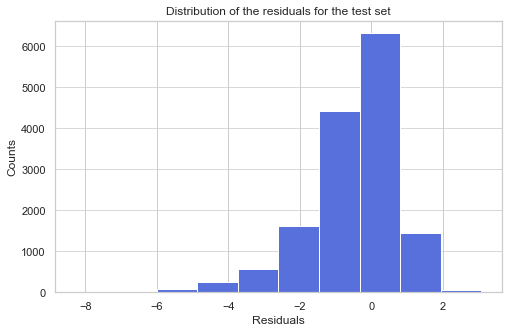

In [31]:
residuals = y_test_longitudinal - y_pred_longitudinal
plt.figure(figsize = (8,5))
residuals.plot(kind = "hist", grid = True, rwidth = 1, color = color_palette[5])
plt.title('Distribution of the residuals for the test set')
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.grid(axis = 'y', alpha = 0.75)

We estimate the probability that our score prediction is off by more than 2-points. We do the absolute value because the residual can be negative or positive (predicting a score of 5 instead of 8 or 11 instead of 8)

In [32]:
proba = (abs(residuals) > 2).sum() / len(residuals)
print("The probability that our score prediction is off by more than 2-points is", round(proba, 3))

The probability that our score prediction is off by more than 2-points is 0.109


We will now do bootstrap confidence intervals for our probability to be off by more than 2-points. We have to repeat the collection N times. We can select N randomly but not to big to avoid a long computation time. We choose N to be 500.

In [33]:
N = 500
residuals = np.zeros(N)
probas = []

for i in range(N):
    # Generate a bootstrapped sample from the data frame of test longitudinal
    # We first get the random indices
    indices_test = np.random.randint(0, len(df_test_longitudinal), len(df_test_longitudinal)).tolist()

    # Then we create the new data frame with these indices
    test_longitudinal_temp = df_test_longitudinal.iloc[indices_test,:]

    # Separate into x_test and y_test
    x_test_temp = test_longitudinal_temp[feature_cols]
    y_test_temp = test_longitudinal_temp.score 

    # Predict the score of the x_test
    y_pred_temp = lin_reg_longitudinal.predict(x_test_temp)
    
    # Compute the residuals and the probability to be off by more than 2-points
    residuals = y_test_temp - y_pred_temp
    probas.append((abs(residuals) > 2).sum() / residuals.shape[0])

probas = np.sort(probas)

print("Probability that the prediction is off by more than 2 points: ", probas.mean())

confidence_interval_99 = (probas[int(0.005 * N)], probas[int(0.995 * N)])
print("There is 99% chance that the real probability is in the confidence interval :", confidence_interval_99)

confidence_interval_95 = (probas[int(0.025 * N)], probas[int(0.975 * N)])
print("There is 95% chance that the real probability is in the confidence interval :", confidence_interval_95)

confidence_interval_90 = (probas[int(0.05 * N)], probas[int(0.95 * N)])
print("There is 90% chance that the real probability is in the confidence interval :", confidence_interval_90)

Probability that the prediction is off by more than 2 points:  0.10943841562669561
There is 99% chance that the real probability is in the confidence interval : (0.10356755290287574, 0.11577590884427563)
There is 95% chance that the real probability is in the confidence interval : (0.10472056429734129, 0.1146228974498101)
There is 90% chance that the real probability is in the confidence interval : (0.10512750949538796, 0.11360553445469343)


We find the confidence intervals above. Their visual representations can be seen in the plot below.

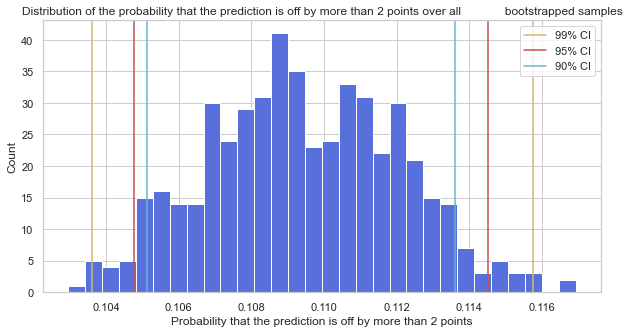

In [34]:
plt.figure(figsize = (10,5))
plt.hist(probas, bins = 30, color = color_palette[5])
plt.axvline(x = np.percentile(probas,[0.5]), ymin = 0, ymax = 1, label = '99% CI', c = 'y')
plt.axvline(x = np.percentile(probas,[99.5]), ymin = 0, ymax = 1, c = 'y')
plt.axvline(x = np.percentile(probas,[2.5]), ymin = 0, ymax = 1, label = '95% CI', c = 'r')
plt.axvline(x = np.percentile(probas,[97.5]), ymin = 0, ymax = 1, c = 'r')
plt.axvline(x = np.percentile(probas,[5]), ymin = 0, ymax = 1, label = '90% CI', c = 'c')
plt.axvline(x = np.percentile(probas,[95]), ymin = 0, ymax = 1, c = 'c')
plt.xlabel('Probability that the prediction is off by more than 2 points')
plt.ylabel('Count')
plt.title('Distribution of the probability that the prediction is off by more than 2 points over all \
            bootstrapped samples')
plt.legend();

_4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set._

We use the alternate train-split data set from the task above to fit our Gradient Boosting Regressor and then predict the scores.

In [35]:
# Training the Gradient Boosting Regressor on the longitudinal split
gbr = GradientBoostingRegressor()
gbr.fit(x_train_longitudinal, y_train_longitudinal)

# Testing
y_pred_longitudinal_gradient = gbr.predict(x_test_longitudinal)

# Evaluating the coefficient of determination
r2_gradient_longitudinal = r2_score(y_test_longitudinal, y_pred_longitudinal_gradient)
print("The coefficient of determination of the Gradient Boosting Regressor on the longitudinal split equals", \
      round(r2_gradient_longitudinal, 3))

The coefficient of determination of the Gradient Boosting Regressor on the longitudinal split equals -0.438


We obtain $R^2$ = -0.44 meaning that the model selected does not follow the trend of the data. Also, one could note that it is worse than the model with Linear Regression. To better understand the difference, we plot the importance of the features for each model.

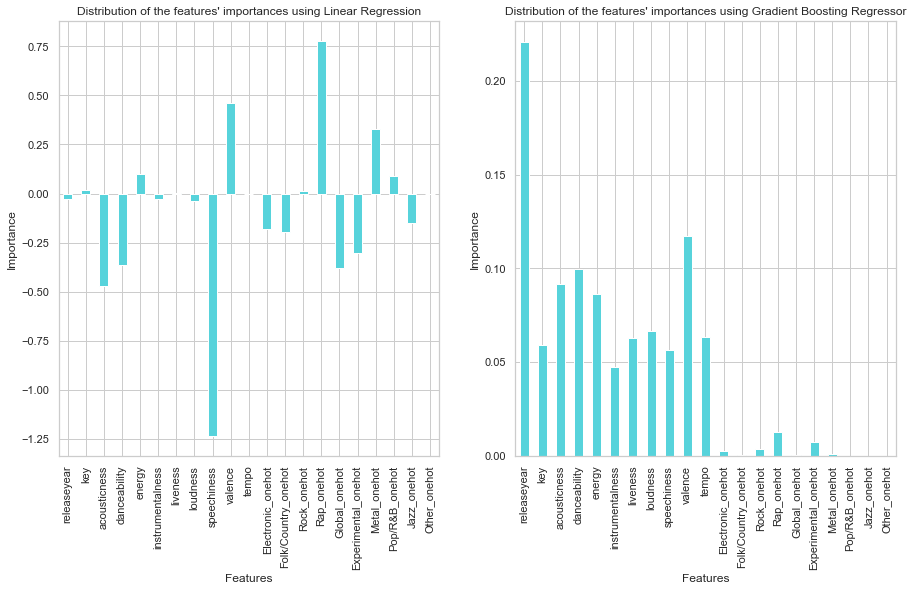

In [36]:
fig, axs = plt.subplots(ncols = 2, figsize = (15, 8))
importance_linear = pd.Series(lin_reg_longitudinal.coef_)
importance_linear.plot(ax = axs[0], kind = 'bar', color = color_palette[4])
axs[0].set_title("Distribution of the features' importances using Linear Regression")
axs[0].set_xticklabels(feature_cols)
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Importance")

importance_gradient_boosting = pd.Series(gbr.feature_importances_)
importance_gradient_boosting.plot(ax = axs[1], kind = 'bar', color = color_palette[4])
axs[1].set_title("Distribution of the features' importances using Gradient Boosting Regressor")
axs[1].set_xticklabels(feature_cols)
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Importance");

We can see that the important features are not the same for Linear Regression and Gradient Boosting regressor. 

_5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor._

Gradient Boosting regressor is performing worse than Linear Regression. It can be explained by the fact that we are splitting the data into before 2000 and after 2003 which causes a bias. In fact, we have seen in the task 1.2 that the scores for the years before 2000 are much higher than the ones after 2003, so training on such different data sets causes problem. Moreover, because the Gradient Boosting Regressor performs extremely well for a variety of tasks, we can imagine that it fitted so well the training set (overfitting) that it causes even more error on the prediction for the testing set.

Additionally, the most important feature for Gradient Boosting Regressor is `releaseyear` and that could explain the bias. Indeed, as we are in the case of a longitudinal split and the `releaseyear` of the training set are completely different from the `releaseyear` of the testing set. To have this feature with so much importance will unfortunately cause errors in the prediction.

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

_1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns._

Let's select the artists that have more than 1 album.

In [37]:
# Aggregating album count number of each artist 
mult_art = cleaned_df.groupby("artist")["album"].agg('count')

# Using the mask to select only artisits with more than 1 album
mult_art = mult_art[mult_art > 1]
mult_art.shape

(3563,)

It seems there only 3563 artists that have more than 1 album. Let's create our new dataframe which contains only rows with more than 1 allbum.

In [38]:
# Selecting only rows with more than 1 album and sorting at the same time
second_df = cleaned_df[cleaned_df.artist.isin(mult_art.index)].sort_values(by = ["artist", "releaseyear"])
print(second_df.shape)
second_df.head().round(decimals = 3)

(12405, 28)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Other_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot
7411,!!!,split ep,Dominique Leone,6.0,1999.0,2004-02-12,GSL,Rock,0.470,0.910,...,0,0,0,0,0,0,0,0,0,1
6891,!!!,louden up now,Nick Sylvester,7.0,2004.0,2004-06-07,Touch and Go,Rock,0.808,0.752,...,0,0,0,0,0,0,0,0,0,1
10517,!!!,myth takes,Brian Howe,8.0,2007.0,2007-03-02,Warp,Rock,0.646,0.832,...,0,0,0,0,0,0,0,0,0,1
10053,!!!,"strange weather, isn't it?",Larry Fitzmaurice,6.9,2010.0,2010-08-20,Warp,Rock,0.712,0.882,...,0,0,0,0,0,0,0,0,0,1
2397,!!!,thr!!!er,Brian Howe,6.0,2013.0,2013-04-30,Warp,Rock,0.778,0.798,...,0,0,0,0,0,0,0,0,0,1


We define our features of interest that we wish to add a suffix to:

In [39]:
features = feature_cols + ["score"]

We compute the mean of the previous albums (without the last one) by creating a new dataframe, and we also add the _previous suffix at the same time 

In [40]:
# Creation of a new dataframe
df_without_last_album = second_df.where(second_df.duplicated("artist", keep = "last")).dropna()

# Compute the mean and add the _previous suffix
previous_means = second_df.where(second_df.duplicated("artist", keep = "last")).groupby(["artist"]).mean()[features] \
                                    .add_suffix("_previous")
previous_means.head().round(decimals = 3)

,releaseyear_previous,key_previous,acousticness_previous,danceability_previous,energy_previous,instrumentalness_previous,liveness_previous,loudness_previous,speechiness_previous,valence_previous,...,Folk/Country_onehot_previous,Rock_onehot_previous,Rap_onehot_previous,Global_onehot_previous,Experimental_onehot_previous,Metal_onehot_previous,Pop/R&B_onehot_previous,Jazz_onehot_previous,Other_onehot_previous,score_previous
artist,,,,,,,,,,,,,,,,,,,,,
!!!,2009.286,5.560,0.070,0.702,0.817,0.184,0.192,-6.456,0.076,0.682,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.871
(sandy) alex g,2017.000,6.071,0.283,0.461,0.589,0.313,0.223,-7.043,0.050,0.463,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.400
...and you will know us by the trail of dead,2005.600,4.641,0.223,0.452,0.618,0.201,0.202,-7.377,0.058,0.322,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.170
03 greedo,2018.333,4.705,0.136,0.724,0.529,0.004,0.172,-7.954,0.160,0.346,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.867
13 & god,2005.000,4.500,0.478,0.627,0.573,0.434,0.162,-11.962,0.065,0.191,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.100


We drop the album duplicates of our initial dataframe by sorting it first with respect to artists. Then, we merge it with the means of the columns_previous computed above.

In [41]:
df_last_albums = second_df.drop_duplicates("artist", keep = "last").sort_values("artist")
df_last_albums = df_last_albums.merge(previous_means, on = "artist")

print(df_last_albums.shape)
df_last_albums.head(3).round(decimals = 3)

(3563, 50)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,...,Folk/Country_onehot_previous,Rock_onehot_previous,Rap_onehot_previous,Global_onehot_previous,Experimental_onehot_previous,Metal_onehot_previous,Pop/R&B_onehot_previous,Jazz_onehot_previous,Other_onehot_previous,score_previous
0,!!!,wallop,Jesse Dorris,7.2,2019.0,2019-09-07,none,Rock,0.746,0.738,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.871
1,(sandy) alex g,house of sugar,Anna Gaca,8.6,2019.0,2019-09-16,none,Rock,0.494,0.640,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.400
2,...and you will know us by the trail of dead,ix,Stuart Berman,7.2,2014.0,2014-10-21,Superball,Rock,0.416,0.914,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.170


_2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set._

Let's define our features and label.

In [42]:
X = df_last_albums.drop(['score', 'artist', 'album', 'genre','reviewauthor','reviewdate', 'recordlabel'], axis = 1)
y = df_last_albums.score

We train and run a gradient boosting regressor on (70/30) random train-test-split data.

In [43]:
# Splitting the data before training
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 123)

# Training the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Testing
y_pred_gradient = gbr.predict(x_test)

# Evaluating the coefficient of determination
r2_gradient_longitudinal = r2_score(y_test, y_pred_gradient)
print("The coefficient of determination of the Gradient Boosting Regressor equals", round(r2_gradient_longitudinal, 3))

The coefficient of determination of the Gradient Boosting Regressor equals 0.213


We see that after adding the features _previous, the $R^2$ increases from -0.44 to 0.21.

_3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario._ 
- _n_estimators $ \in  \{ 100, 200, 300, 400\}$._
- _learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$._
 
_With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set._

We define our `cross_validation` function with N-fold which in addition tunes 2 hyperparamters : the `n_estimators` and `learning_rat`.

In [44]:
def cross_validation(X, y, params_list, N):
    '''
    Function that divides full dataset to N parts, test on one part, train on all others. By doing that we
    tuned the parameters of our model to have the best r2.
    Inputs:
        * X : array of features
        * y : array of labels
        * N : number of parts (integer)
    Output:
        * params_best : learning rate and n_estimators
        * r2_best : Best R-square
    '''
    # Build k indices for k-fold
    num_row = y.shape[0]
    interval = int(num_row / N)
    indices = np.random.permutation(num_row)
    k_indices = np.array([indices[k * interval: (k + 1) * interval]
                 for k in range(N)])

    r2_means, r2_full, ci90s, params_best, r2_best = [], [], [], None, -1

    # Go through all parameters
    for params in params_list:
        # Cross validation 
        r2_all = []
        for k in range(N):
            
            # Get k'th subgroup in test, others in train
            k_val = np.reshape(np.vstack((k_indices[:k, :], k_indices[k+1:,])), -1)
            x_train = X.iloc[k_val]
            x_test = X.iloc[k_indices[k]]
            y_train = y.iloc[k_val]
            y_test = y.iloc[k_indices[k]]
            reg = GradientBoostingRegressor(n_estimators=params[1], learning_rate=params[0]).fit(x_train, y_train)

            # Evaluate the model
            preds_test = reg.predict(x_test)
            r2_all.append(r2_score(y_test, preds_test))
            
        # Choose the best parameters
        r2_mean = np.mean(r2_all)
        r2_full.append(r2_all)
        r2_means.append(r2_mean)
        
        # We compute 90% confidence interval
        ci90s.append([round(sorted(r2_all)[N//10-1], 3), round(sorted(r2_all)[N-N//10-1], 3)]) 
        
        if r2_mean > r2_best:
            params_best = params
            r2_best = r2_mean
    
    results_df = pd.DataFrame({"Parameters (lr, n_estimator)": params_list, "90% CI": ci90s, "R2": r2_means})
    
    return params_best, r2_best, results_df

We call the `cross_validation` function.

In [45]:
# Hyperparameters to test
learning_rates = [0.1, 0.05, 0.01]
n_estimators = [100, 200, 300, 400]
params_list = list(itertools.product(learning_rates, n_estimators))

# K_fold
N = 20

# Get best parameters 
(learning_rate, n_estimator), r2_best, results_df = cross_validation(x_train, y_train, params_list, N)
results_df

,"Parameters (lr, n_estimator)",90% CI,R2
0,"(0.1, 100)","[-0.031, 0.264]",0.162792
1,"(0.1, 200)","[-0.053, 0.252]",0.141479
2,"(0.1, 300)","[-0.121, 0.243]",0.123129
3,"(0.1, 400)","[-0.147, 0.241]",0.109325
4,"(0.05, 100)","[-0.073, 0.28]",0.169578
5,"(0.05, 200)","[-0.125, 0.267]",0.157204
6,"(0.05, 300)","[-0.142, 0.266]",0.141293
7,"(0.05, 400)","[-0.195, 0.267]",0.131579
8,"(0.01, 100)","[0.042, 0.218]",0.154720
9,"(0.01, 200)","[-0.001, 0.258]",0.173762


In [46]:
# Try best parameters on data
reg = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=learning_rate).fit(x_train, y_train)
preds_test = reg.predict(x_test)

Let's have a look at the test and training $R^2$.

In [47]:
print("Best parameters: learning_rate =", learning_rate, ", n_estimator =", n_estimator)
reg = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=learning_rate).fit(x_train, y_train)
preds_train = reg.predict(x_train)
print("The coefficient R2 of determination of the Gradient Boosting Regressor on the training split equals" \
      , round(r2_score(y_train, preds_train), 3))
preds_test = reg.predict(x_test)
r2_gradient = r2_score(y_test, preds_test)
print("The coefficient R2 of determination of the Gradient Boosting Regressor on the test split equals" \
      , round(r2_gradient, 3))

Best parameters: learning_rate = 0.01 , n_estimator = 300
The coefficient R2 of determination of the Gradient Boosting Regressor on the training split equals 0.325
The coefficient R2 of determination of the Gradient Boosting Regressor on the test split equals 0.215


As expected, the test $R^2$ is smaller than the training one.

_**Discuss**: How do these results compare with the previous setup (the scenario considered in Task 3.4)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?_

In generality, we notice that our $R^2$ is much higher in the tak 4.3 than in the task 3.4. It is hard to compare the 2 results obtained at face value for the following reasons :
   - In task 4.3, we performed a hyperparameter tuning to search for the best one as opposed to the task 3.4 where we only took the default parameters. Thus, we cannot compare them on an equal basis even we use the same method in each case.
   - In task 3.4, the data was split in a longitudinal fashion while it was split randomely (70/30) in the 4.3 task. In addition, we added some features in the task 4.3 and decreased significantly the sample size. This induces, the fact that the two methods, while the same, were not evaluated the same way nor on the same dataset. Furthermore, we have seen that the longitudinal split is not really ideal.    
   
To be able to conduct a fair comparison between the two set-up is to evaluate our model on the same dataset and split. It implies using a seed to fix the randomness of our evaluation as well as tune the hyperparameters and use cross-validation in both cases.

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

_1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty._

Let's start by reminding ourselves of the initial size of our cleaned dataframe (without the  duplicate reviews).

In [48]:
cleaned_df_part2.shape

(16738, 18)

We remove rows where the release year is empty by only keeping rows where the release year is a float.

In [49]:
cleaned_df_part2 = cleaned_df_part2[cleaned_df_part2['releaseyear'].map(lambda x: isinstance(x, float))]
cleaned_df_part2.shape

(16738, 18)

It seems that no release years were empty. We now only keep artists with two or more albums. The function `duplicated` returns boolean Series denoting duplicate rows. The argument `False` marks all duplicates as True.

In [50]:
duplicates_df = cleaned_df_part2[cleaned_df_part2.duplicated(subset = ['artist'], keep = False)].copy() 
print(duplicates_df.shape)
duplicates_df.head().round(decimals = 3)

(12414, 18)


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,john fahey,the great santa barbara oil slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.370,0.325,4.471,-19.154,0.149,0.647,0.559,0.528,0.179,107.623
2,reigning sound,too much guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,0.199,0.553,133.896
4,mac miller,swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121
5,french kicks,swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121
6,jessica lea mayfield,with blasphemy so heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.448,0.399,6.500,-8.402,0.032,0.695,0.004,0.123,0.238,111.550


4324 rows were removed. We now have a data frame `duplicates_df` containing only albums from artists with two or more albums and where the release year is not empty, for a total of 12414 rows (albums).

_2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album)._

We start by creating the column `album_number` (having empty entries) to our dataframe.

In [51]:
duplicates_df['album_number'] = ""

Let's create a data frame containing all artists with two or more albums.

In [52]:
artists = pd.DataFrame(duplicates_df['artist'].value_counts(dropna = False))
print(artists.size)
artists

3566


,artist
neil young,27
bonnie “prince” billy,22
guided by voices,20
animal collective,20
gucci mane,19
...,...
greet death,2
damian marley,2
asmus tietchens,2
khemmis,2


Those are a total of 3566 artists, having from 2 to 27 albums. This is two more artists that what we found in task 4 but this is because we use the data frame from task 1.1.

To fill the new column `album_number`, indicating how many albums the artist has produced before this one, we proceed the following way. For each artist, we sort his/her albums by release year. We then assign to each album the number of albums released before it. Finally, we add those indices to the initial `duplicates_df` data frame.

In [53]:
for artist in artists.index:
    artists_order = duplicates_df[duplicates_df['artist'] == artist].sort_values(by = 'releaseyear', axis = 0, \
                            ascending = True).copy()
    artists_order = artists_order.reset_index(drop = True)
    for album in artists_order.album:
        duplicates_df.loc[duplicates_df.index.values[np.logical_and(duplicates_df['album'] == album, \
                            duplicates_df['artist'] == artist)], 'album_number'] = \
                            artists_order.index.values[artists_order['album'] == album]
        

Let's visualise the `album_number` values of the albums of the artist Mac Miller.

In [54]:
artist = 'mac miller'
duplicates_df[duplicates_df['artist'] == artist][['artist','album','releaseyear','album_number']].head()

,artist,album,releaseyear,album_number
4,mac miller,swimming,2018.0,4
5034,mac miller,the divine feminine,2016.0,3
5507,mac miller,blue slide park,2011.0,0
7955,mac miller,faces,2014.0,2
9048,mac miller,watching movies with the sound off,2013.0,1


It seems that our method works properly.

Still, Mac Miller has a different release year for each of his albums. To check what happens when two albums from the same artist are released the same year, we display the albums from Guided by Voices, having released 20 albums (c.f. above), increasing therefore the probability for two albums to be released the same year.

In [55]:
artist = 'guided by voices'
duplicates_df[duplicates_df['artist'] == artist][['artist','album','releaseyear','reviewdate','album_number']].head(20)

,artist,album,releaseyear,reviewdate,album_number
827,guided by voices,hold on hope ep,2000.0,March 31 2000,2
1017,guided by voices,universal truths and cycles,2002.0,June 23 2002,5
1367,guided by voices,"live from austin, tx",2007.0,June 1 2007,8
1864,guided by voices,earthquake glue,2003.0,August 24 2003,6
4483,guided by voices,please be honest,2016.0,April 21 2016,17
4820,guided by voices,how do you spell heaven,2017.0,August 11 2017,19
5797,guided by voices,down by the racetrack ep,2013.0,January 30 2013,14
6535,guided by voices,english little league,2013.0,May 1 2013,13
8371,guided by voices,the bears for lunch,2012.0,November 12 2012,11
8597,guided by voices,suitcase 3: up we go now,2009.0,November 16 2009,9


We see that several albums were indeed released the same year. For albums having the same release year, our method orders them randomly. Another possibility could be to order them by review date. Still, we see that the two first albums of Guided by Voices, released in 1992 and 1995, were respectively reviewed in 2005 and 2016, being long after their releases. As a result, using the review date could be misleading in our opinion - some albums being reviewed long after their release. Therefore, we prefer to let it random.

_3. Calculate the mean and the standard error of the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions._

We start by defining a function to compute the mean and standard deviation of albums in the dataset.

In [56]:
def compute_mean_and_std(ith_album, df):
    """
    Computes the mean and the std of the scores of the ith albums.
    Inputs:
        * ith_album : number of the album (integer)
        * df : data frame containing the scores of the ith albums
    Outputs:
        * mean : mean of the scores of the ith albums
        * std : std of the scores of the ith albums
    """
    mean = df[df['album_number'] == ith_album]['score'].mean()
    std = df[df['album_number'] == ith_album]['score'].std()
    return mean, std

We compute the mean and standard deviation for the 1st and 2nd albums.

In [57]:
first_albums_mean, first_albums_std = compute_mean_and_std(0, duplicates_df)
second_albums_mean, second_albums_std = compute_mean_and_std(1, duplicates_df)

Lets now visualise those means in a table.

In [58]:
stat_df = pd.DataFrame()
stat_df['condition'] = ['1st album', '2nd album']
stat_df['mean'] = first_albums_mean, second_albums_mean
stat_df['std'] = first_albums_std, second_albums_std
stat_df.set_index('condition', inplace = True)
stat_df.round(2)

,mean,std
condition,,
1st album,7.30,1.24
2nd album,7.04,1.27


Finally, we plot the distributions.

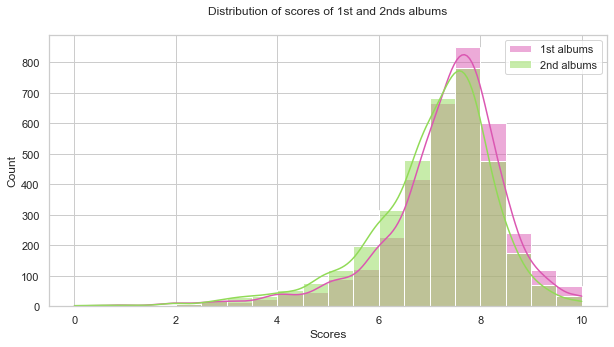

In [59]:
plt.figure(figsize = (10,5))
sns.histplot(duplicates_df[duplicates_df['album_number'] == 0].score, kde = True, label ='1st albums', \
                         bins = 20, color = color_palette[7])
sns.histplot(duplicates_df[duplicates_df['album_number'] == 1].score, kde=True, label = '2nd albums', \
                         bins = 20, color = color_palette[2])
plt.legend()
plt.xlabel('Scores')
plt.title('Distribution of scores of 1st and 2nds albums', pad = 20);


_4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?_

To analyse whether there is a statistical difference between the scores of the 1st and 2nd albums, we calculate the T-test for the means of two independent samples.

- The test statistic: s = `score`<sub>1st album</sub> – `score`<sub>2nd album</sub> 
- The null hypothesis H<sub>0</sub>: `score`<sub>1st album</sub> = `score`<sub>2nd album</sub> i.e.`score` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

We set our significance level α at 0.05 (a suitable “small” probability), being high enough to have a low false-positive rate and therefore a high statistical power.

In [60]:
ttest_ind(duplicates_df[duplicates_df['album_number'] == 0]['score'], \
                        duplicates_df[duplicates_df['album_number'] == 1]['score'])


Ttest_indResult(statistic=8.627339056891048, pvalue=7.65509444654324e-18)

This test evaluates, if the two albums behaved the same way, how likely would we be to find such a distribution of `score` values. This test results in a p value of 7.66 * 10<sup>-18</sup>, being inferior to 0.05. As a result, we reject the null hypothesis that `score` values are the same for the 1st and 2nd albums (under α = 0.05).

_5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?_

In 5.3, we saw that the mean of `score` is slightly lower for the 2nd albums, compared to the 1st albums. As a result, we could speculate that the second albums seem to be slightly less good in terms of score compared from the first albums, suggesting the existance of the second album syndrome.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


_1.Create a new dataframe containing one row per 1st-2nd album pair, with `score_diff`, `time_diff` and `did_style_change`._

Let's remind us of our duplicates data frame.

In [61]:
duplicates_df.head().round(decimals = 3)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
1,john fahey,the great santa barbara oil slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.370,0.325,4.471,-19.154,0.149,0.647,0.559,0.528,0.179,107.623,2
2,reigning sound,too much guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,0.199,0.553,133.896,0
4,mac miller,swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121,4
5,french kicks,swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.625,0.438,4.154,-9.456,0.170,0.652,0.013,0.121,0.281,122.121,3
6,jessica lea mayfield,with blasphemy so heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.448,0.399,6.500,-8.402,0.032,0.695,0.004,0.123,0.238,111.550,0


We first check that there are the same number of 1st and 2nd albums, and that this number is equal to the number of artists.

To start, we store all columns name containing numerical music information.

In [62]:
musique_related_numerical = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
                                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

We then create a data frame containing all useful information for the first albums, then print its size.

In [63]:
first_albums = duplicates_df[duplicates_df['album_number'] == 0][['artist', 'score', 'releaseyear']]
first_albums.rename(columns = {"score":"score_first", 'releaseyear':'releaseyear_first'}, inplace = True)

musique_related_numerical_first = ['danceability_first', 'energy_first', 'key_first', 'loudness_first',  
                                   'speechiness_first', 'acousticness_first', 'instrumentalness_first', 
                                   'liveness_first', 'valence_first', 'tempo_first']

first_albums[musique_related_numerical_first] = duplicates_df[duplicates_df['album_number'] == 0] \
                                                    [musique_related_numerical]


first_albums.shape[0]

3566

The same is done for the second albums.

In [64]:
second_albums = duplicates_df[duplicates_df['album_number'] == 1][['artist', 'score', 'releaseyear']]
second_albums.rename(columns = {"score":"score_second", 'releaseyear':'releaseyear_second'}, inplace = True)

musique_related_numerical_second = ['danceability_second', 'energy_second', 'key_second', 'loudness_second', 
                                   'speechiness_second', 'acousticness_second', 'instrumentalness_second', 
                                   'liveness_second', 'valence_second', 'tempo_second']
second_albums[musique_related_numerical_second] = duplicates_df[duplicates_df['album_number'] == 1] \
                                                    [musique_related_numerical]

second_albums.shape[0]

3566

As we will merge the data frames on the artist, we check whether this size is equal to the number of artists. We already created a data frame `artists` in task 5.2.

In [65]:
artists.size

3566

We are happy to see that we indeed have a matching number of artists, first albums and second albums. As a result, we can now merge the `first_albums` and `second_albums` dataframes to be able to easily operate on the same row.

In [66]:
first_second_albums = pd.merge(first_albums, second_albums, on = 'artist')
first_second_albums.head().round(decimals = 3)

,artist,score_first,releaseyear_first,danceability_first,energy_first,key_first,loudness_first,speechiness_first,acousticness_first,instrumentalness_first,...,danceability_second,energy_second,key_second,loudness_second,speechiness_second,acousticness_second,instrumentalness_second,liveness_second,valence_second,tempo_second
0,reigning sound,8.3,2004.0,0.254,0.913,4.429,-1.090,0.056,0.000,0.751,...,0.444,0.593,5.900,-8.794,0.032,0.175,0.156,0.228,0.598,129.280
1,jessica lea mayfield,8.2,2008.0,0.448,0.399,6.500,-8.402,0.032,0.695,0.004,...,0.525,0.621,7.000,-7.364,0.116,0.049,0.000,0.294,0.591,191.900
2,the essex green,8.1,2000.0,0.729,0.932,5.000,-3.038,0.062,0.002,0.197,...,0.259,0.951,2.000,-3.221,0.093,0.001,0.002,0.162,0.257,144.510
3,american football,8.6,1999.0,0.483,0.682,5.222,-9.122,0.032,0.273,0.362,...,0.515,0.725,8.625,-6.763,0.029,0.009,0.141,0.106,0.291,127.068
4,fidlar,7.0,2013.0,0.362,0.874,6.929,-3.942,0.058,0.003,0.266,...,0.466,0.900,4.833,-2.973,0.089,0.083,0.183,0.273,0.392,141.334


We have 3566 artists that released at least two albums. We can now compute our three rows: `score_diff`, `time_diff` and `did_style_change`.

Let's start by creating our data frame of interest from the merged data frame.

In [67]:
album_pair_df = pd.DataFrame()
album_pair_df['artist'] = first_second_albums['artist']
album_pair_df['score_diff'] = first_second_albums['score_second'] - first_second_albums['score_first']
album_pair_df['time_diff'] = (first_second_albums['releaseyear_second'] - \
    first_second_albums['releaseyear_first']) * 365 # We multiply by 365 to have a time_diff in days

To find the standardized euclidean distance, we compute the variance on the whole dataset.

In [68]:
Variance = np.var(duplicates_df[musique_related_numerical])

We compute the standardized euclidean distance on each row between the first and the second albums.

In [69]:
for ind in range(album_pair_df.shape[0]):
    album_pair_df.loc[ind, 'did_style_change'] \
            = seuclidean(first_second_albums[musique_related_numerical_first].iloc[ind].values,
                first_second_albums[musique_related_numerical_second].iloc[ind].values, 
                V = Variance.values)

We now attribute '1' value to the 20% most distant albums and '0' to all others.

In [70]:
album_pair_sorted =  album_pair_df.sort_values('did_style_change', ascending=False)
print(album_pair_sorted.head(-5))

percent20 = album_pair_sorted.shape[0]//20

album_pair_df.iloc[:percent20, album_pair_df.columns.get_loc('did_style_change')] = album_pair_sorted.iloc[
    :percent20, album_pair_df.columns.get_loc('did_style_change')] = 1

album_pair_df.iloc[percent20 + 1:, album_pair_df.columns.get_loc('did_style_change')] = album_pair_sorted.iloc[
    percent20 + 1:, album_pair_df.columns.get_loc('did_style_change')] = 0

                      artist  score_diff  time_diff  did_style_change
1077            babe rainbow         0.0     1460.0         25.393351
1492                  unsane         0.0      730.0         24.400895
2757              vondelpark         0.7     1095.0         23.607478
1455                the cure        -0.6     1460.0         12.471498
631             jello biafra         2.3      730.0         12.471006
...                      ...         ...        ...               ...
394               grinderman         0.4     1095.0          0.000000
1048             luke vibert        -0.4      365.0          0.000000
1305              ryan adams         0.0        0.0          0.000000
609               sicko mobb        -1.1      365.0          0.000000
916   the other people place         1.0        0.0          0.000000

[3561 rows x 4 columns]


Let's have a look at this data frame.

In [71]:
album_pair_df.head(-5)

,artist,score_diff,time_diff,did_style_change
0,reigning sound,-0.5,365.0,1.0
1,jessica lea mayfield,-0.5,1095.0,1.0
2,the essex green,-1.9,1095.0,1.0
3,american football,-0.5,7300.0,1.0
4,fidlar,-1.2,730.0,1.0
...,...,...,...,...
3556,steely dan,-0.8,365.0,0.0
3557,aimee mann,-1.4,730.0,0.0
3558,bonnie ‚äúprince‚äù billy,0.0,0.0,0.0
3559,...and you will know us by the trail of dead,-0.1,730.0,0.0


_2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`._

We define our linear regression function using the formula api to be able to specify the independent variables.

In [72]:
def linear_reg(data, formula, seed):
    model_intercept = smf.ols(formula = formula, data = data)
    # Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
    res = model_intercept.fit()
    return res

We now call our function with our `album_pair_df` data frame, after setting a seed of '1' for reproducibility.

In [73]:
res_intercept = linear_reg(data = album_pair_df, formula = 'score_diff ~ 1', seed = seed)

print(res_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                nan
Time:                        20:49:28   Log-Likelihood:                -6209.7
No. Observations:                3566   AIC:                         1.242e+04
Df Residuals:                    3565   BIC:                         1.243e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2562      0.023    -11.081      0.0

_3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?_

We obtain $R^2 = 0$. However, it does not represent a poor fit here. Fitting a model with an intercept prevents us from computing the r-square, as the total sum of squares will be the same as the residual sum of squares.

We obtain an intercept value of -0.256. This suggests that, ignoring all parameters, the score between album 1 and album 2 is correlated to a dropping score of -0.256 for album 2.
The second album syndrome and our observation in task 5 are supported in this analysis by a p-value inferior to 0.001 and a fully negative 95% confidence interval. We have statistical evidence to reject the null hypothesis that the score difference between album 1 and 2 is null under alpha = 0.05.

_4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model._

We fit the regression again, this time including the covariates `time_diff` and `did_style_change` (seed equal to '1' for reproducibility).

In [74]:
res = linear_reg(data = album_pair_df, formula = 'score_diff ~ time_diff + did_style_change', seed = seed)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.18
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.28e-15
Time:                        20:49:28   Log-Likelihood:                -6176.8
No. Observations:                3566   AIC:                         1.236e+04
Df Residuals:                    3563   BIC:                         1.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1337      0.028  

_5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?_

* Parameters:

In our model, a time difference (`time_diff`) between album 1 and album 2 is associated with a loss of -9,14e-05 score, holding all other parameters constant. Thus each year elapsing from album 1 and album 2 will result in a drop of 0.034 score.
We obtain for time_diff a p-value smaller than 0.001. Hence we can reject the null hypothesis that time difference between the album and score aren't correlated and deduce that they are negatively correlated. This is reinforced by the fact that we obtain a fully negative 95% confidence interval ([-0.41, -0,025]).

`did_style_change` is a binary parameter, equal to 1 when the artist changed his style between album 1 and 2 and it is equal to 0 if he/she did not. In our linear model, a unit change of *did_style_change* is associated to a -0.0463 change of *score_diff*, holding all other parameters constant. However, we find for this parameter a very large p-value, equal to 0.65. Furthermore, the 95% confidence interval contains values from -0.246 to 0.154, going from negative to positive. Thus, we cannot reject the null hypothesis.

* Hypotheses:

The **time spent hypothesis** suggests that we should find a positive correlation between *time_diff* and *score_diff*, showing how time preparation helps obtaining a better score. However, we obtain a negative value for this correlation, suggesting that the more years pass between the first and second album is correlated with a lower of the second album. This new hypothesis is supported with a p-value inferior to 0.001 and a fully negative 95% confidence interval between.

The **style change hypothesis** suggests that we should find a negative correlation between *did_style_change* and *score_diff*, showing that changing style after a first album isn't usually welcomed by the public. Although we find a negative correlation for our model, we obtain a very large p-value and a broad 95% confidence interval. Thus, we can not reject the null hypothesis which states that *did_style_change* and *score_diff* are not correlated. Their correlation in our model could be due to chance.

* Conclusion:

To conclude, we reject the **time spent hypothesis**. However, we now have a new hypothesis negatively correlating *time_diff* and *score_diff*. 

Then, regarding the **style change hypothesis**, our data does not allow us to draw proper conclusions on the change of music style between the two albums and their related scores. To investigate the existence of a possible negative correlation, we could try another way of determining whether the style did change or not.

_6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column._

We start by observing the `time_diff` distribution.

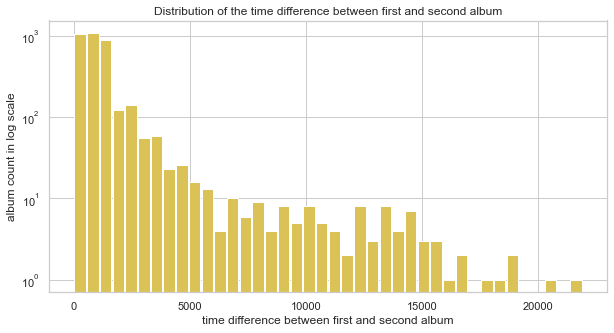

In [75]:
plt.figure(figsize = (10,5))
album_pair_df['time_diff'].plot(kind = 'hist', bins = 40, grid = True, rwidth = 0.9, color = color_palette[1])
plt.yscale('log')

plt.title('Distribution of the time difference between first and second album')
plt.xlabel("time difference between first and second album")
plt.ylabel("album count in log scale")

plt.show()

We observe a right skewed distribution hence, using standardization is not very accurate as the data mean and standard deviation is not very representative of the data. 
We have to keep in mind that the distribution we obtain after standardization will also be skewed .

In [76]:
album_pair_df['time_diff_standardized'] = (album_pair_df['time_diff'] - album_pair_df['time_diff'].mean()) / \
    album_pair_df['time_diff'].std()


We fit the linear regression again, this time including `time_diff_standardized`.

In [77]:
res_time_standardized = linear_reg(data = album_pair_df, \
                                formula = 'score_diff ~ time_diff_standardized + did_style_change', seed = seed)
print(res_time_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.18
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.28e-15
Time:                        20:49:29   Log-Likelihood:                -6176.8
No. Observations:                3566   AIC:                         1.236e+04
Df Residuals:                    3563   BIC:                         1.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

_7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?_

We define the parameters `time_diff` and `time_diff_standardized` with their corresponding values.

In [78]:
time_diff_param = -9.144e-5
time_diff_standardized_param = -0.1864

`time_diff` parameter is associated with a 1 year change (which correspond to 1 in value), between album 1's score and album 2's score.

On the other hand `time_diff_standardized` is associated to 1 standard deviation (SD). Here, SD is equal to the maximum time elapsed between album 1 and 2 minus the minimum time elapsed.
To be able to properly compare those two parameters, we divide `time_diff_standardized` by its standard deviation.

In [79]:
SD = album_pair_df['time_diff'].std()
comparable_time_diff_standardized_param = time_diff_standardized_param/SD
print("time_diff_param = ", time_diff_param, "\n")
print("time_diff_standardized_param divided by its SD = ", round(comparable_time_diff_standardized_param,8))

time_diff_param =  -9.144e-05 

time_diff_standardized_param divided by its SD =  -9.151e-05


We realize that both methods lead to same evaluation for parameter `time_diff`. Standardization would however be useful to scale multiple parameters such that their value be more easily comparable.

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


_1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?_

The Second Album Syndrome is a theory that states that the second album of a band always sucks. This theory says nothing about the third album. Still, one could think that if the artist "survives" the second album (suffering from the pressure to be produced within a year, and/or mainly consisting of the songs that were cut from the first album because they were considered inferior, and/or due to a change of style of the artist), the third album that he/she produces should be better than the second one. This would lead to an increase in the mean score of the third album, compared to its previous downfall.

Another way to see this is to suppose that some artists will not "survive" the downfall of their second albums. Indeed, the downfall of the second album will decrease the popularity of the artist. As a result, even if he/she still releases a third album, it is possible that it will also not be well received by the public and therefore have a similar or even lower score when compared to the second album.

Finally, a last idea could be that the Second Album Syndrome does not exactly "lasts" for one album, but rathers for a few albums, then the artist "heals" and re-increase in popularity (or stops releasing albums). This would mean that the third and fourth albums could be part of this syndrom, having low scores, similar to the score of the second album.

_2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant._

We start by computing the mean and standard deviation for the 3rd and 4th albums. The mean and standard deviation for the 1st and 2nd albums were already calculated in task 5.

In [80]:
third_albums_mean, third_albums_std = compute_mean_and_std(2, duplicates_df)
fourth_albums_mean, fourth_albums_std = compute_mean_and_std(3, duplicates_df)

Lets visualise those means and standard deviations in a table.

In [81]:
stat2_df = pd.DataFrame()
stat2_df['condition'] = ['1st album', '2nd album', '3rd album', '4th album']
stat2_df['mean'] = first_albums_mean, second_albums_mean, third_albums_mean, fourth_albums_mean
stat2_df['std'] = first_albums_std, second_albums_std, third_albums_std, fourth_albums_std
stat2_df.set_index('condition', inplace = True)
stat2_df.round(2)

,mean,std
condition,,
1st album,7.30,1.24
2nd album,7.04,1.27
3rd album,7.05,1.22
4th album,7.04,1.22


The scores of the third and second albums have the same mean, while the standard deviation of the scores of the third albums is slightly lower.

To analyse whether there is a statistical difference between the scores of the 2nd and 3rd albums, we calculate the T-test for the means of two independent samples.

- The test statistic: s = `score`<sub>2nd album</sub> – `score`<sub>3rd album</sub> 
- The null hypothesis H<sub>0</sub>: `score`<sub>2nd album</sub> = `score`<sub>3rd album</sub> i.e.`score` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

Again, we set our significance level α at 0.05 (a suitable “small” probability), being high enough to have a low false-positive rate and therefore a high statistical power.

In [82]:
ttest_ind(duplicates_df[duplicates_df['album_number'] == 1]['score'], \
          duplicates_df[duplicates_df['album_number'] == 2]['score'])

Ttest_indResult(statistic=-0.07246756007746105, pvalue=0.942232449218503)

This test evaluates, if the two albums behaved the same way, how likely would we be to find such a distribution of `score` values. This test results in a p-value of 0.94, being superior to 0.05. As a result, we do not reject the null hypothesis that `score` values are the same for the 2nd and 3rd albums (under α = 0.05).

Still, we are not comparing the same artists as we suppose some artists only released two albums while others released at least three. To compare the 2nd and 3rd albums of the same artists, we will create a data frame containing only the artists having released at least 3 albums.

In [83]:
artists_count = duplicates_df.groupby(["artist"]).album.count()
artists_many_albums = artists_count.where(artists_count > 3).dropna().index
artists_many_albums.shape

(1178,)

We have 1178 artists that released at least three albums. Let's create their sub data frame.

In [84]:
triplets_df = duplicates_df[duplicates_df.artist.isin(artists_many_albums)]
triplets_df.shape

(6866, 19)

Those artists released a total of 6866 albums. We now calculate the mean and the standard error of the 2nd and 3rd albums.

In [85]:
second_albums_mean, second_albums_std = compute_mean_and_std(1, triplets_df)
third_albums_mean, third_albums_std = compute_mean_and_std(2, triplets_df)

In [86]:
stat3_df = pd.DataFrame()
stat3_df['condition'] = ['2nd album', '3rd album']
stat3_df['mean'] = second_albums_mean, third_albums_mean
stat3_df['std'] = second_albums_std, third_albums_std
stat3_df.set_index('condition', inplace = True)
stat3_df.round(2)

,mean,std
condition,,
2nd album,7.35,1.32
3rd album,7.17,1.25


In [87]:
ttest_ind(triplets_df[triplets_df['album_number'] == 1]['score'], \
          triplets_df[triplets_df['album_number'] == 2]['score'])

Ttest_indResult(statistic=3.4480205833446083, pvalue=0.000574633084834746)

This test evaluates, if the two albums behaved the same way, how likely would we be to find such a distribution of `score` values. This test results in a p-value of 0.00057, being inferior to 0.05. As a result, we can reject the null hypothesis that `score` values are the same for the 2nd and 3rd albums (under α = 0.05). As the mean of `score` is slightly lower for the 3rd albums, compared to the 2nd albums, we could speculate that the third albums seem to be slightly less good in terms of score compared from the second albums.

_3. **Discuss:** Does this suggest that the Second Album Syndrome exists?_

Our first T test, performed on the album scores from artists who released at least two albums, did not reject the null hypothesis. This does not suggest a statistically significant difference between the second and third albums (under α = 0.05).

Our second T test, performed on the album scores from artists who released at least three albums, rejected the null hypothesis, suggesting that the scores are different between the second and third albums. Due to the lower mean scores of the third albums compared to the second albums, this leads us to believe that perhaps the third albums tend to be slightly less good in terms of score compared from the second albums.

Having both these results in hand, it seems that they tend to suggest the idea that the Second Album Syndrome does not exactly "lasts" for one album, but rathers for a few albums, then the artist either "heals" and re-increases in popularity, or "dies" and stops releasing albums. Therefore, it seems that this syndrom exists but is not only restrained to the second album.

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

**Simulation:**

We start by creating 1000 hypothetical bands with intrinsic talents, uniformally distributed between 2 and 8.

In [88]:
bands_df = pd.DataFrame()
bands_df['talent'] = np.random.uniform(low = 2, high = 8, size = 1000)

We now create a hypothetical album for each hypothetical band, having a score normally distributed with their talent as mean and a standard deviation 1.

In [89]:
def create_album_score(df, n):
    """
    Adds a column to the data frame df containing the score of the album n
    Inputs:
        * df : data frame containing bands with talents
        * n : album number
    Outputs:
        * output : same data frame containing bands with talents with the additional score
    """
    for i in df.index:
        df.loc[i, 'album{}_score'.format(n)] = np.random.normal(df.loc[i, 'talent'], 1)
    return df
        

In [90]:
bands_df = create_album_score(bands_df, 1)

Let's visualise our data frame.

In [91]:
bands_df.head().round(decimals = 3)

,talent,album1_score
0,3.582,2.088
1,4.675,2.989
2,4.168,3.386
3,5.100,6.057
4,3.270,4.998


We now discard all bands whose albums received a score smaller than 6.

In [92]:
successful_bands_df = bands_df[bands_df['album1_score'] >= 6].copy()

Finally, for each of the remaining bands, we create two additional albums.

In [93]:
successful_bands_df = create_album_score(successful_bands_df, 2)
successful_bands_df = create_album_score(successful_bands_df, 3)

Let's visualise the data frame containing the 3 album scores of the successful bands.

In [94]:
successful_bands_df.head(20).round(decimals = 3)

,talent,album1_score,album2_score,album3_score
3,5.100,6.057,4.886,4.983
9,6.122,6.925,7.449,6.369
14,6.664,6.495,6.551,7.367
15,6.618,6.193,5.931,8.913
19,6.548,6.997,5.644,7.500
23,5.211,6.930,5.285,5.780
31,6.969,7.236,6.351,8.234
38,7.073,7.301,7.658,5.266
41,5.663,6.694,5.252,5.573
45,5.558,6.202,7.728,5.193


**Analysis of the scores:**

We'll now analyse the scores obtained in this simulation. The mean and the standard error of the 1st, 2nd and 3rd albums are computed.

In [95]:
album1_score_mean = successful_bands_df.album1_score.mean()
album2_score_mean = successful_bands_df.album2_score.mean()
album3_score_mean = successful_bands_df.album3_score.mean()

album1_score_std = successful_bands_df.album1_score.std()
album2_score_std = successful_bands_df.album2_score.std()
album3_score_std = successful_bands_df.album3_score.std()

Let's visualise it in a table.

In [96]:
stat4_df = pd.DataFrame()
stat4_df['condition'] = ['1st album','2nd album', '3rd album']
stat4_df['mean'] = album1_score_mean, album2_score_mean, album3_score_mean
stat4_df['std'] = album1_score_std, album2_score_std, album3_score_std
stat4_df.set_index('condition', inplace = True)
stat4_df.round(2)

,mean,std
condition,,
1st album,7.18,0.85
2nd album,6.81,1.33
3rd album,6.79,1.32


It seems that the second albums of the successful bands have lower scores than their first albums. To see if that difference is significant, we perform a T-test. Let's note that the standard deviation of the first albums is much lower that for the second and third albums as we specifically selected the scores > 6.

To analyse whether there is a statistical difference between the scores of the 1st and 2nd albums, we calculate the T-test for the means of two independent samples.

- The test statistic: s = `score`<sub>1st album</sub> – `score`<sub>2nd album</sub> 
- The null hypothesis H<sub>0</sub>: `score`<sub>1st album</sub> = `score`<sub>2nd album</sub> i.e.`score` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

We set our significance level α at 0.05 (a suitable “small” probability), being high enough to have a low false-positive rate and therefore a high statistical power.

In [97]:
ttest_ind(successful_bands_df['album1_score'], successful_bands_df['album2_score'])

Ttest_indResult(statistic=4.268008398739101, pvalue=2.268891774040292e-05)

This test evaluates, if the two albums behaved the same way, how likely would we be to find such a distribution of `score` values. This test results in a p-value of 2.27 * 10<sup>-5</sup>, being inferior to 0.05. As a result, we reject the null hypothesis that `score` values are the same for the 1st and 2nd albums (under α = 0.05).

We saw that the mean of `score` is slightly lower for the 2nd albums, compared to the 1st albums. As a result, we could speculate that the second albums seem to be slightly less good in terms of score compared from the first albums.

To analyse whether there is a statistical difference between the scores of the 2nd and 3rd albums, we calculate the T-test for the means of two independent samples.

- The test statistic: s = `score`<sub>2nd album</sub> – `score`<sub>3rd album</sub> 
- The null hypothesis H<sub>0</sub>: `score`<sub>2nd album</sub> = `score`<sub>3rd album</sub> i.e.`score` values are the same in both conditions
- We reject H<sub>0</sub> if Pr(S > s | H<sub>0</sub>) < α

Again, we set our significance level α at 0.05 (a suitable “small” probability), being high enough to have a low false-positive rate and therefore a high statistical power.

In [98]:
ttest_ind(successful_bands_df['album2_score'], successful_bands_df['album3_score'])

Ttest_indResult(statistic=0.17427748575077343, pvalue=0.8617021629239348)

This test evaluates, if the two albums behaved the same way, how likely would we be to find such a distribution of `score` values. This test results in a p-value of 0.86, being superior to 0.05. As a result, we do not reject the null hypothesis that `score` values are the same for the 2nd and 3rd albums (under α = 0.05).

**Discussion:**

Those hypothetical results are really interesting as they are similar to what we found with our real data.

Looking at the second albums of our hypothetical data, it is statistically different from the first album but not from the third album. This was predictable as our 1st albums dataset is a selected dataset, only containing albums with high scores, compared to the second and third albums datasets containing scores normally distributed with the band's talent as mean and a standard deviation of 1. 

When one thinks about it, discarding all bands whose first albums received a score smaller than 6 is quite similar to "real life". Indeed, we suppose an unknown artist will only be successful in music and get known if his/her first album is "really good". Then, his/her future albums will be "average" (normally distributed around his/her talent). Therefore, it is coherent that there will in general be a significant difference between the two first albums (the first being "really good" and the second "average"), but then none for the following albums.

A visual interpretation of this effect can been seen on the plot below.

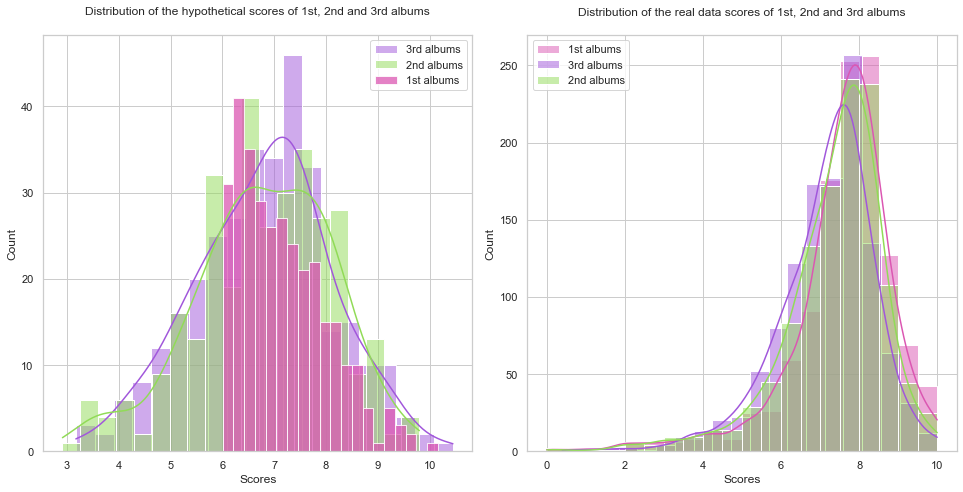

In [99]:
fig = plt.figure(figsize = (27,7))

ax1 = fig.add_subplot(141)
sns.histplot(successful_bands_df['album3_score'], kde = True, label = '3rd albums', \
                         bins = 20, color = color_palette[6])
sns.histplot(successful_bands_df['album2_score'], kde = True, label = '2nd albums', \
                         bins = 20, color = color_palette[2])
sns.histplot(successful_bands_df['album1_score'], kde = False, label = '1st albums', \
                         bins = 20, color = color_palette[7])
plt.legend()
plt.xlabel('Scores')
plt.title('Distribution of the hypothetical scores of 1st, 2nd and 3rd albums', pad = 20);
    
ax2 = fig.add_subplot(142)
sns.histplot(triplets_df[triplets_df['album_number'] == 0].score, kde = True, label = '1st albums', \
                         bins = 20, color = color_palette[7])
sns.histplot(triplets_df[triplets_df['album_number'] == 2].score, kde=True, label = '3rd albums', \
                         bins = 20, color =  color_palette[6])

sns.histplot(triplets_df[triplets_df['album_number'] == 1].score, kde=True, label = '2nd albums', \
                         bins = 20, color = color_palette[2])
plt.legend()
plt.xlabel('Scores')
plt.title('Distribution of the real data scores of 1st, 2nd and 3rd albums', pad = 20)

plt.tight_layout()
plt.show();